In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.ticker as mtick

In [3]:
def encode(data, col, max_val):
    data[col + '_sin'] = np.sin(2 * np.pi * data[col]/max_val)
    data[col + '_cos'] = np.cos(2 * np.pi * data[col]/max_val)
    return data

In [4]:
# Read in all datato a dataframe
df1=pd.read_csv('weatherHistory.csv', sep=',')

# Reformat data in date/time column 
df1['Formatted Date'] =  pd.to_datetime(df1['Formatted Date'])

# Create a new column for year / month / hour
df1['Year'] = pd.DatetimeIndex(df1['Formatted Date']).year
df1['Month'] = pd.DatetimeIndex(df1['Formatted Date']).month
df1['Hour'] = pd.DatetimeIndex(df1['Formatted Date']).hour

# Encode month and hour for cyclical nature
df1 = encode(df1, 'Month', 13)
df1 = encode(df1, 'Hour', 23)
df1 = encode(df1, 'Wind Bearing (degrees)', 359)

# Remove original date/time column
df1=df1.drop(['Formatted Date'],axis=1)

# Convert columns to factors
df1['Summary'] = df1['Summary'].astype('category')
df1['Precip Type'] = df1['Precip Type'].astype('category')
df1['Daily Summary'] = df1['Daily Summary'].astype('category')

# Create a column stating whether its mostly cloudy / overcast or not in summary
df1['Heavy_Cloud'] = pd.np.where(df1.Summary.str.contains("Mostly Cloudy"), 1,
                    pd.np.where(df1.Summary.str.contains("Overcast"), 1,
                    pd.np.where(df1.Summary.str.contains("Foggy"), 1,0)))

# Convert to boolean and print count
df1['Heavy_Cloud']=df1['Heavy_Cloud'].astype('bool')

# Create a column stating whether its mostly cloudy / overcast or not in summary
df1['New_Summary'] = pd.np.where(df1.Summary.str.contains("Mostly Cloudy"), "Heavy Cloud / Rain",
                    pd.np.where(df1.Summary.str.contains("Overcast"), "Heavy Cloud / Rain",
                    pd.np.where(df1.Summary.str.contains("Foggy"), "Heavy Cloud / Rain",
                    pd.np.where(df1.Summary.str.contains("Rain"), "Heavy Cloud / Rain",
                    pd.np.where(df1.Summary.str.contains("Drizzle"), "Heavy Cloud / Rain",            
                    pd.np.where(df1.Summary.str.contains("Partly Cloudy"), "Light Cloud","Clear"))))))

# Convert to boolean and print count
df1['New_Summary']=df1['New_Summary'].astype('category')

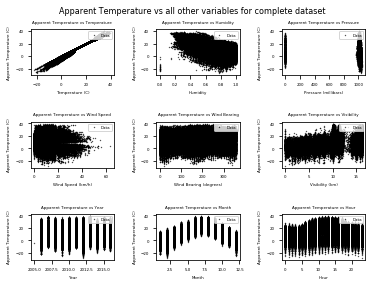

In [5]:

# ax1=plt.subplot(421)
fig, [[ax1,ax2,ax3],[ax4,ax5,ax6],[ax7,ax8,ax9]] =plt.subplots(nrows=3,ncols=3)
fig.suptitle('Apparent Temperature vs all other variables for complete dataset', fontsize=8)
### Apparent Temperature vs Actual Temperature
ax1.scatter(df1['Temperature (C)'],df1['Apparent Temperature (C)'],c='black',s=0.1, label='Data')
ax1.set_xlabel('Temperature (C)',fontsize=4)
ax1.set_ylabel('Apparent Temperature (C)',fontsize=4)
ax1.set_title('Apparent Temperature vs Temperature',fontsize=4)
ax1.tick_params(axis = 'both', which = 'major', labelsize = 4)
ax1.legend(loc=1,fontsize=4)

### Apparent Temperature vs Humidity
ax2.scatter(df1['Humidity'],df1['Apparent Temperature (C)'],c='black',s=0.1, label='Data')
ax2.set_xlabel('Humidity',fontsize=4)
ax2.set_ylabel('Apparent Temperature (C)',fontsize=4)
ax2.set_title('Apparent Temperature vs Humidity',fontsize=4)
ax2.tick_params(axis = 'both', which = 'major', labelsize = 4)
ax2.legend(loc=1,fontsize=4)

## Apparent Temperature vs Pressure
ax3.scatter(df1['Pressure (millibars)'],df1['Apparent Temperature (C)'],c='black',s=0.1, label='Data')
ax3.set_xlabel('Pressure (millibars)',fontsize=4)
ax3.set_ylabel('Apparent Temperature (C)',fontsize=4)
ax3.set_title('Apparent Temperature vs Pressure',fontsize=4)
ax3.legend(loc=1,fontsize=4)
ax3.tick_params(axis = 'both', which = 'major', labelsize = 4)

## Apparent Temperature vs Wind Speed
ax4.scatter(df1['Wind Speed (km/h)'],df1['Apparent Temperature (C)'],c='black',s=0.1, label='Data')
ax4.set_xlabel('Wind Speed (km/h)',fontsize=4)
ax4.set_ylabel('Apparent Temperature (C)',fontsize=4)
ax4.set_title('Apparent Temperature vs Wind Speed',fontsize=4)
ax4.legend(loc=1,fontsize=4)
ax4.tick_params(axis = 'both', which = 'major', labelsize = 4)

## Apparent Temperature vs Wind Bearing Normal
ax5.scatter(df1['Wind Bearing (degrees)'],df1['Apparent Temperature (C)'],c='black',s=0.1, label='Data')
ax5.set_xlabel('Wind Bearing (degrees)',fontsize=4)
ax5.set_ylabel('Apparent Temperature (C)',fontsize=4)
ax5.set_title('Apparent Temperature vs Wind Bearing',fontsize=4)
ax5.legend(loc=1,fontsize=4)
ax5.tick_params(axis = 'both', which = 'major', labelsize = 4)

## Apparent Temperature vs Visibility
ax6.scatter(df1['Visibility (km)'],df1['Apparent Temperature (C)'],c='black',s=0.1, label='Data')
ax6.set_xlabel('Visibility (km)',fontsize=4)
ax6.set_ylabel('Apparent Temperature (C)',fontsize=4)
ax6.set_title('Apparent Temperature vs Visibility',fontsize=4)
ax6.legend(loc=1,fontsize=4)
ax6.tick_params(axis = 'both', which = 'major', labelsize = 4)

## Apparent Temperature vs Year
ax7.scatter(df1['Year'],df1['Apparent Temperature (C)'],c='black',s=0.1, label='Data')
ax7.set_xlabel('Year',fontsize=4)
ax7.set_ylabel('Apparent Temperature (C)',fontsize=4)
ax7.set_title('Apparent Temperature vs Year',fontsize=4)
ax7.legend(loc=1,fontsize=4)
ax7.tick_params(axis = 'both', which = 'major', labelsize = 4)

## Apparent Temperature vs Month
ax8.scatter(df1['Month'],df1['Apparent Temperature (C)'],c='black',s=0.1, label='Data')
ax8.set_xlabel('Month',fontsize=4)
ax8.set_ylabel('Apparent Temperature (C)',fontsize=4)
ax8.set_title('Apparent Temperature vs Month',fontsize=4)
ax8.legend(loc=1,fontsize=4)
ax8.tick_params(axis = 'both', which = 'major', labelsize = 4)

## Apparent Temperature vs Hour
ax9.scatter(df1['Hour'],df1['Apparent Temperature (C)'],c='black',s=0.1, label='Data')
ax9.set_xlabel('Hour',fontsize=4)
ax9.set_ylabel('Apparent Temperature (C)',fontsize=4)
ax9.set_title('Apparent Temperature vs Hour',fontsize=4)
ax9.legend(loc=1,fontsize=4)
ax9.tick_params(axis = 'both', which = 'major', labelsize = 4)

plt.subplots_adjust(top=0.9, bottom=0.1, left=0.125, right=0.9, hspace=1,wspace=0.5)
# plt.show()
plt.savefig('Exploratory_Plot_1.png',dpi=600)

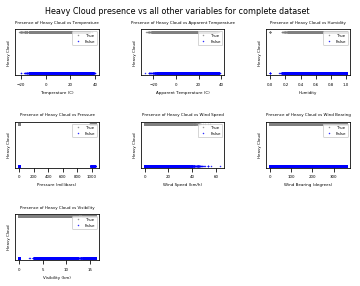

In [6]:
fig, [[ax1,ax2,ax3],[ax4,ax5,ax6],[ax7,ax8,ax9]] =plt.subplots(nrows=3,ncols=3)
fig.suptitle('Heavy Cloud presence vs all other variables for complete dataset', fontsize=8)
ax1.scatter(df1['Temperature (C)'].loc[np.where(df1["Heavy_Cloud"]==True)],
           df1['Heavy_Cloud'].loc[np.where(df1["Heavy_Cloud"]==True)],
           c='grey',s=0.2, label='True')
ax1.scatter(df1['Temperature (C)'].loc[np.where(df1["Heavy_Cloud"]==False)],
           df1['Heavy_Cloud'].loc[np.where(df1["Heavy_Cloud"]==False)],
           c='blue',s=0.2, label='False')
ax1.set_xlabel('Temperature (C)',fontsize=4)
ax1.set_ylabel('Heavy Cloud',fontsize=4)
ax1.set_title('Presence of Heavy Cloud vs Temperature',fontsize=4)
ax1.tick_params(axis = 'both', which = 'major', labelsize = 4)
ax1.axes.get_yaxis().set_ticks([])
ax1.legend(loc=1,fontsize=4)

ax2.scatter(df1['Apparent Temperature (C)'].loc[np.where(df1["Heavy_Cloud"]==True)],
           df1['Heavy_Cloud'].loc[np.where(df1["Heavy_Cloud"]==True)],
           c='grey',s=0.2, label='True')
ax2.scatter(df1['Apparent Temperature (C)'].loc[np.where(df1["Heavy_Cloud"]==False)],
           df1['Heavy_Cloud'].loc[np.where(df1["Heavy_Cloud"]==False)],
           c='blue',s=0.2, label='False')
ax2.set_xlabel('Apparent Temperature (C)',fontsize=4)
ax2.set_ylabel('Heavy Cloud',fontsize=4)
ax2.set_title('Presence of Heavy Cloud vs Apparent Temperature',fontsize=4)
ax2.tick_params(axis = 'both', which = 'major', labelsize = 4)
ax2.axes.get_yaxis().set_ticks([])
ax2.legend(loc=1,fontsize=4)

ax3.scatter(df1['Humidity'].loc[np.where(df1["Heavy_Cloud"]==True)],
           df1['Heavy_Cloud'].loc[np.where(df1["Heavy_Cloud"]==True)],
           c='grey',s=0.2, label='True')
ax3.scatter(df1['Humidity'].loc[np.where(df1["Heavy_Cloud"]==False)],
           df1['Heavy_Cloud'].loc[np.where(df1["Heavy_Cloud"]==False)],
           c='blue',s=0.2, label='False')
ax3.set_xlabel('Humidity',fontsize=4)
ax3.set_ylabel('Heavy Cloud',fontsize=4)
ax3.set_title('Presence of Heavy Cloud vs Humidity',fontsize=4)
ax3.tick_params(axis = 'both', which = 'major', labelsize = 4)
ax3.axes.get_yaxis().set_ticks([])
ax3.legend(loc=1,fontsize=4)

ax4.scatter(df1['Pressure (millibars)'].loc[np.where(df1["Heavy_Cloud"]==True)],
           df1['Heavy_Cloud'].loc[np.where(df1["Heavy_Cloud"]==True)],
           c='grey',s=0.2, label='True')
ax4.scatter(df1['Pressure (millibars)'].loc[np.where(df1["Heavy_Cloud"]==False)],
           df1['Heavy_Cloud'].loc[np.where(df1["Heavy_Cloud"]==False)],
           c='blue',s=0.2, label='False')
ax4.set_xlabel('Pressure (millibars)',fontsize=4)
ax4.set_ylabel('Heavy Cloud',fontsize=4)
ax4.set_title('Presence of Heavy Cloud vs Pressure',fontsize=4)
ax4.tick_params(axis = 'both', which = 'major', labelsize = 4)
ax4.axes.get_yaxis().set_ticks([])
ax4.legend(loc=1,fontsize=4)

ax5.scatter(df1['Wind Speed (km/h)'].loc[np.where(df1["Heavy_Cloud"]==True)],
           df1['Heavy_Cloud'].loc[np.where(df1["Heavy_Cloud"]==True)],
           c='grey',s=0.2, label='True')
ax5.scatter(df1['Wind Speed (km/h)'].loc[np.where(df1["Heavy_Cloud"]==False)],
           df1['Heavy_Cloud'].loc[np.where(df1["Heavy_Cloud"]==False)],
           c='blue',s=0.2, label='False')
ax5.set_xlabel('Wind Speed (km/h)',fontsize=4)
ax5.set_ylabel('Heavy Cloud',fontsize=4)
ax5.set_title('Presence of Heavy Cloud vs Wind Speed',fontsize=4)
ax5.tick_params(axis = 'both', which = 'major', labelsize = 4)
ax5.axes.get_yaxis().set_ticks([])
ax5.legend(loc=1,fontsize=4)

ax6.scatter(df1['Wind Bearing (degrees)'].loc[np.where(df1["Heavy_Cloud"]==True)],
           df1['Heavy_Cloud'].loc[np.where(df1["Heavy_Cloud"]==True)],
           c='grey',s=0.2, label='True')
ax6.scatter(df1['Wind Bearing (degrees)'].loc[np.where(df1["Heavy_Cloud"]==False)],
           df1['Heavy_Cloud'].loc[np.where(df1["Heavy_Cloud"]==False)],
           c='blue',s=0.2, label='False')
ax6.set_xlabel('Wind Bearing (degrees)',fontsize=4)
ax6.set_ylabel('Heavy Cloud',fontsize=4)
ax6.set_title('Presence of Heavy Cloud vs Wind Bearing',fontsize=4)
ax6.tick_params(axis = 'both', which = 'major', labelsize = 4)
ax6.axes.get_yaxis().set_ticks([])
ax6.legend(loc=1,fontsize=4)

ax7.scatter(df1['Visibility (km)'].loc[np.where(df1["Heavy_Cloud"]==True)],
           df1['Heavy_Cloud'].loc[np.where(df1["Heavy_Cloud"]==True)],
           c='grey',s=0.2, label='True')
ax7.scatter(df1['Visibility (km)'].loc[np.where(df1["Heavy_Cloud"]==False)],
           df1['Heavy_Cloud'].loc[np.where(df1["Heavy_Cloud"]==False)],
           c='blue',s=0.2, label='False')
ax7.set_xlabel('Visibility (km)',fontsize=4)
ax7.set_ylabel('Heavy Cloud',fontsize=4)
ax7.set_title('Presence of Heavy Cloud vs Visibility',fontsize=4)
ax7.tick_params(axis = 'both', which = 'major', labelsize = 4)
ax7.axes.get_yaxis().set_ticks([])
ax7.legend(loc=1,fontsize=4)

ax8.set_visible(False)
ax9.set_visible(False)

plt.subplots_adjust(top=0.9, bottom=0.1, left=0.125, right=0.9, hspace=1,wspace=0.5)
# plt.show()
plt.savefig('Exploratory_Plot_2.png',dpi=600)

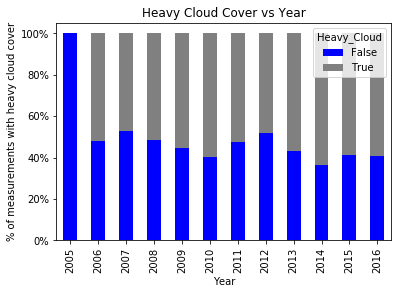

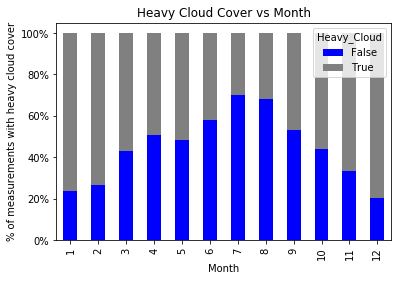

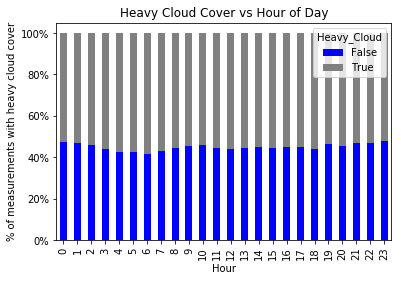

In [7]:


df1.groupby(['Year','Heavy_Cloud'])['Heavy_Cloud'].size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()).unstack().plot(kind='bar',stacked=True,color=['blue','grey'])
plt.ylabel('% of measurements with heavy cloud cover')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.title("Heavy Cloud Cover vs Year")
# plt.show()
plt.savefig('Exploratory_Plot_3.png',dpi=600)

df1.groupby(['Month','Heavy_Cloud'])['Heavy_Cloud'].size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()).unstack().plot(kind='bar',stacked=True,color=['blue','grey'])
plt.ylabel('% of measurements with heavy cloud cover')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.title("Heavy Cloud Cover vs Month")
# plt.show()
plt.savefig('Exploratory_Plot_4.png',dpi=600)

df1.groupby(['Hour','Heavy_Cloud'])['Heavy_Cloud'].size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()).unstack().plot(kind='bar',stacked=True,color=['blue','grey'])
plt.ylabel('% of measurements with heavy cloud cover')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.title("Heavy Cloud Cover vs Hour of Day")
# plt.show()
plt.savefig('Exploratory_Plot_5.png',dpi=600)

Heavy_Cloud
False    43390
True     53063
dtype: int64

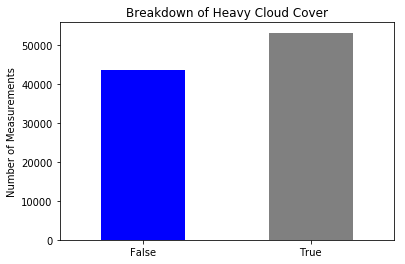

In [8]:
df1.groupby("Heavy_Cloud").size().plot(kind='bar',color=['blue','grey'])
plt.title("Presence of Heavy Cloud Cover")
plt.xlabel("")
plt.xticks(rotation=0)
plt.ylabel("Number of Measurements")
plt.title("Breakdown of Heavy Cloud Cover")
plt.savefig('Exploratory_Plot_6.png',dpi=600)

df1.groupby("Heavy_Cloud").size()

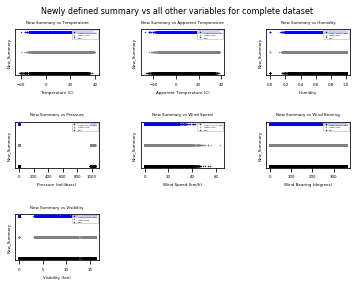

In [9]:
fig, [[ax1,ax2,ax3],[ax4,ax5,ax6],[ax7,ax8,ax9]] =plt.subplots(nrows=3,ncols=3)

fig.suptitle('Newly defined summary vs all other variables for complete dataset', fontsize=8)

ax1.scatter(df1['Temperature (C)'].loc[np.where(df1["New_Summary"]=="Heavy Cloud / Rain")],
           df1['New_Summary'].loc[np.where(df1["New_Summary"]=="Heavy Cloud / Rain")],
           c='black',s=0.2, label='Heavy Cloud / Rain')
ax1.scatter(df1['Temperature (C)'].loc[np.where(df1["New_Summary"]=="Light Cloud")],
           df1['New_Summary'].loc[np.where(df1["New_Summary"]=="Light Cloud")],
           c='grey',s=0.2, label='Light Cloud')
ax1.scatter(df1['Temperature (C)'].loc[np.where(df1["New_Summary"]=="Clear")],
           df1['New_Summary'].loc[np.where(df1["New_Summary"]=="Clear")],
           c='blue',s=0.2, label='Clear')
ax1.set_xlabel('Temperature (C)',fontsize=4)
ax1.set_ylabel('New_Summary',fontsize=4)
ax1.set_title('New Summary vs Temperature',fontsize=4)
ax1.tick_params(axis = 'both', which = 'major', labelsize = 4)
ax1.axes.get_yaxis().set_ticks([])
ax1.legend(loc=1,fontsize=2)

ax2.scatter(df1['Apparent Temperature (C)'].loc[np.where(df1["New_Summary"]=="Heavy Cloud / Rain")],
           df1['New_Summary'].loc[np.where(df1["New_Summary"]=="Heavy Cloud / Rain")],
           c='black',s=0.2, label='Heavy Cloud / Rain')
ax2.scatter(df1['Apparent Temperature (C)'].loc[np.where(df1["New_Summary"]=="Light Cloud")],
           df1['New_Summary'].loc[np.where(df1["New_Summary"]=="Light Cloud")],
           c='grey',s=0.2, label='Light Cloud')
ax2.scatter(df1['Apparent Temperature (C)'].loc[np.where(df1["New_Summary"]=="Clear")],
           df1['New_Summary'].loc[np.where(df1["New_Summary"]=="Clear")],
           c='blue',s=0.2, label='Clear')
ax2.set_xlabel('Apparent Temperature (C)',fontsize=4)
ax2.set_ylabel('New_Summary',fontsize=4)
ax2.set_title('New Summary vs Apparent Temperature',fontsize=4)
ax2.tick_params(axis = 'both', which = 'major', labelsize = 4)
ax2.axes.get_yaxis().set_ticks([])
ax2.legend(loc=1,fontsize=2)

ax3.scatter(df1['Humidity'].loc[np.where(df1["New_Summary"]=="Heavy Cloud / Rain")],
           df1['New_Summary'].loc[np.where(df1["New_Summary"]=="Heavy Cloud / Rain")],
           c='black',s=0.2, label='Heavy Cloud / Rain')
ax3.scatter(df1['Humidity'].loc[np.where(df1["New_Summary"]=="Light Cloud")],
           df1['New_Summary'].loc[np.where(df1["New_Summary"]=="Light Cloud")],
           c='grey',s=0.2, label='Light Cloud')
ax3.scatter(df1['Humidity'].loc[np.where(df1["New_Summary"]=="Clear")],
           df1['New_Summary'].loc[np.where(df1["New_Summary"]=="Clear")],
           c='blue',s=0.2, label='Clear')
ax3.set_xlabel('Humidity',fontsize=4)
ax3.set_ylabel('New_Summary',fontsize=4)
ax3.set_title('New Summary vs Humidity',fontsize=4)
ax3.tick_params(axis = 'both', which = 'major', labelsize = 4)
ax3.axes.get_yaxis().set_ticks([])
ax3.legend(loc=1,fontsize=2)

ax4.scatter(df1['Pressure (millibars)'].loc[np.where(df1["New_Summary"]=="Heavy Cloud / Rain")],
           df1['New_Summary'].loc[np.where(df1["New_Summary"]=="Heavy Cloud / Rain")],
           c='black',s=0.2, label='Heavy Cloud / Rain')
ax4.scatter(df1['Pressure (millibars)'].loc[np.where(df1["New_Summary"]=="Light Cloud")],
           df1['New_Summary'].loc[np.where(df1["New_Summary"]=="Light Cloud")],
           c='grey',s=0.2, label='Light Cloud')
ax4.scatter(df1['Pressure (millibars)'].loc[np.where(df1["New_Summary"]=="Clear")],
           df1['New_Summary'].loc[np.where(df1["New_Summary"]=="Clear")],
           c='blue',s=0.2, label='Clear')
ax4.set_xlabel('Pressure (millibars)',fontsize=4)
ax4.set_ylabel('New_Summary',fontsize=4)
ax4.set_title('New Summary vs Pressure',fontsize=4)
ax4.tick_params(axis = 'both', which = 'major', labelsize = 4)
ax4.axes.get_yaxis().set_ticks([])
ax4.legend(loc=1,fontsize=2)

ax5.scatter(df1['Wind Speed (km/h)'].loc[np.where(df1["New_Summary"]=="Heavy Cloud / Rain")],
           df1['New_Summary'].loc[np.where(df1["New_Summary"]=="Heavy Cloud / Rain")],
           c='black',s=0.2, label='Heavy Cloud / Rain')
ax5.scatter(df1['Wind Speed (km/h)'].loc[np.where(df1["New_Summary"]=="Light Cloud")],
           df1['New_Summary'].loc[np.where(df1["New_Summary"]=="Light Cloud")],
           c='grey',s=0.2, label='Light Cloud')
ax5.scatter(df1['Wind Speed (km/h)'].loc[np.where(df1["New_Summary"]=="Clear")],
           df1['New_Summary'].loc[np.where(df1["New_Summary"]=="Clear")],
           c='blue',s=0.2, label='Clear')
ax5.set_xlabel('Wind Speed (km/h)',fontsize=4)
ax5.set_ylabel('New_Summary',fontsize=4)
ax5.set_title('New Summary vs Wind Speed',fontsize=4)
ax5.tick_params(axis = 'both', which = 'major', labelsize = 4)
ax5.axes.get_yaxis().set_ticks([])
ax5.legend(loc=1,fontsize=2)

ax6.scatter(df1['Wind Bearing (degrees)'].loc[np.where(df1["New_Summary"]=="Heavy Cloud / Rain")],
           df1['New_Summary'].loc[np.where(df1["New_Summary"]=="Heavy Cloud / Rain")],
           c='black',s=0.2, label='Heavy Cloud / Rain')
ax6.scatter(df1['Wind Bearing (degrees)'].loc[np.where(df1["New_Summary"]=="Light Cloud")],
           df1['New_Summary'].loc[np.where(df1["New_Summary"]=="Light Cloud")],
           c='grey',s=0.2, label='Light Cloud')
ax6.scatter(df1['Wind Bearing (degrees)'].loc[np.where(df1["New_Summary"]=="Clear")],
           df1['New_Summary'].loc[np.where(df1["New_Summary"]=="Clear")],
           c='blue',s=0.2, label='Clear')
ax6.set_xlabel('Wind Bearing (degrees)',fontsize=4)
ax6.set_ylabel('New_Summary',fontsize=4)
ax6.set_title('New Summary vs Wind Bearing',fontsize=4)
ax6.tick_params(axis = 'both', which = 'major', labelsize = 4)
ax6.axes.get_yaxis().set_ticks([])
ax6.legend(loc=1,fontsize=2)

ax7.scatter(df1['Visibility (km)'].loc[np.where(df1["New_Summary"]=="Heavy Cloud / Rain")],
           df1['New_Summary'].loc[np.where(df1["New_Summary"]=="Heavy Cloud / Rain")],
           c='black',s=0.2, label='Heavy Cloud / Rain')
ax7.scatter(df1['Visibility (km)'].loc[np.where(df1["New_Summary"]=="Light Cloud")],
           df1['New_Summary'].loc[np.where(df1["New_Summary"]=="Light Cloud")],
           c='grey',s=0.2, label='Light Cloud')
ax7.scatter(df1['Visibility (km)'].loc[np.where(df1["New_Summary"]=="Clear")],
           df1['New_Summary'].loc[np.where(df1["New_Summary"]=="Clear")],
           c='blue',s=0.2, label='Clear')
ax7.set_xlabel('Visibility (km)',fontsize=4)
ax7.set_ylabel('New_Summary',fontsize=4)
ax7.set_title('New Summary vs Visibility',fontsize=4)
ax7.tick_params(axis = 'both', which = 'major', labelsize = 4)
ax7.axes.get_yaxis().set_ticks([])
ax7.legend(loc=1,fontsize=2)



ax8.set_visible(False)
ax9.set_visible(False)

plt.subplots_adjust(top=0.9, bottom=0.1, left=0.125, right=0.9, hspace=1,wspace=0.5)
# plt.show()
plt.savefig('Exploratory_Plot_7.png',dpi=600)

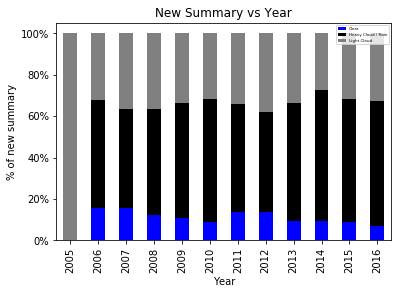

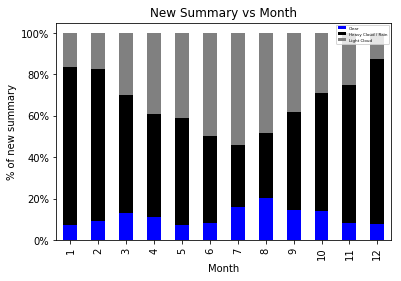

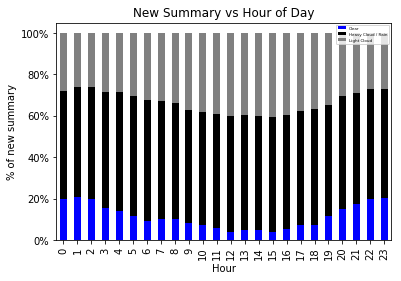

In [10]:
df1.groupby(['Year','New_Summary'])['New_Summary'].size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()).unstack().plot(kind='bar',stacked=True,color=['blue','black','grey'])
plt.ylabel('% of new summary')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.legend(loc=1,fontsize=4)
plt.title("New Summary vs Year")
# plt.show()
plt.savefig('Exploratory_Plot_8.png',dpi=600)

df1.groupby(['Month','New_Summary'])['New_Summary'].size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()).unstack().plot(kind='bar',stacked=True,color=['blue','black','grey'])
plt.ylabel('% of new summary')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.legend(loc=1,fontsize=4)
plt.title("New Summary vs Month")
# plt.show()
plt.savefig('Exploratory_Plot_9.png',dpi=600)

df1.groupby(['Hour','New_Summary'])['New_Summary'].size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()).unstack().plot(kind='bar',stacked=True,color=['blue','black','grey'])
plt.ylabel('% of new summary')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.legend(loc=1,fontsize=4)
plt.title("New Summary vs Hour of Day")
# plt.show()
plt.savefig('Exploratory_Plot_10.png',dpi=600)

New_Summary
Clear                 10988
Heavy Cloud / Rain    53175
Light Cloud           32290
dtype: int64

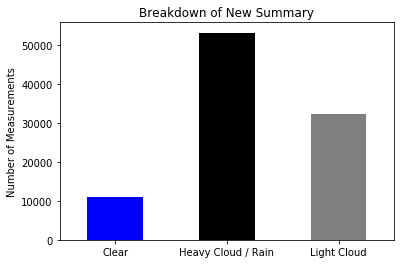

In [11]:
df1.groupby("New_Summary").size().plot(kind='bar',color=['blue','black','grey'])
plt.title("Breakdown of New Summary")
plt.xlabel("")
plt.xticks(rotation=0)
plt.ylabel("Number of Measurements")
plt.savefig('Exploratory_Plot_11.png',dpi=600)

df1.groupby("New_Summary").size()